<span style="font-size:20px"><b>Import Packages</b></span>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<span style="font-size:20px"><b>Load IRIS Data</b></span>

In [43]:
iris_data = pd.read_csv("Downloads/archive/IRIS.csv")
iris_data.index+=1
species  = [x for x in iris_data["species"].unique()]
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


<span style="font-size:20px"><b>Data Preprocessing</b></span>

In [22]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [23]:
iris_data.describe()
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<span style="font-size:20px"><b>Data Plots</b></span>

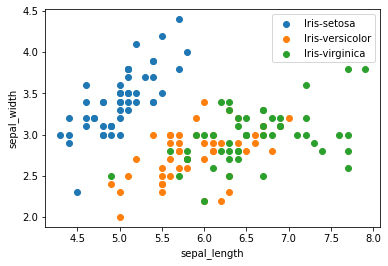

In [53]:
colors=["Red","Green","Blue"]
for i in range(len(species)):
    x  = iris_data[iris_data["species"]==species[i]]
    plt.scatter(x["sepal_length"],x["sepal_width"],label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()

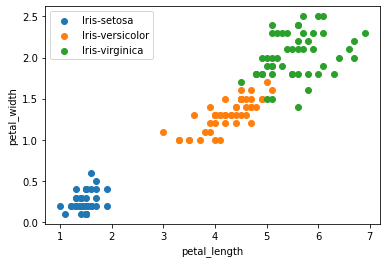

In [54]:
colors=["Red","Green","Blue"]
for i in range(len(species)):
    x  = iris_data[iris_data["species"]==species[i]]
    plt.scatter(x["petal_length"],x["petal_width"],label=species[i])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()

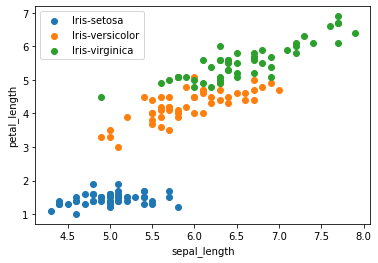

In [55]:
colors=["Red","Green","Blue"]
for i in range(len(species)):
    x  = iris_data[iris_data["species"]==species[i]]
    plt.scatter(x["sepal_length"],x["petal_length"],label=species[i])
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()

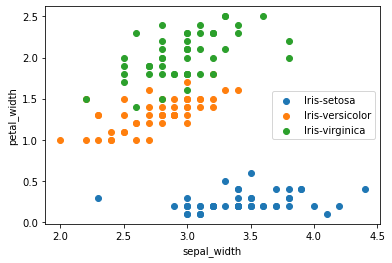

In [56]:
colors=["Red","Green","Blue"]
for i in range(len(species)):
    x  = iris_data[iris_data["species"]==species[i]]
    plt.scatter(x["sepal_width"],x["petal_width"],label=species[i])
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.legend()

<span style="font-size:20px"><b>Correlation Matrix and Visualization</b></span>

In [57]:
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

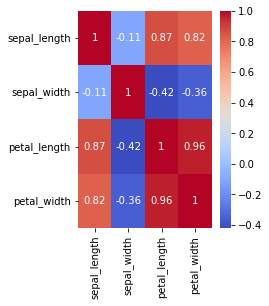

In [62]:
corr = iris_data.corr()
fig,ax = plt.subplots(figsize=(3,4))
sns.heatmap(corr,annot=True,ax=ax,cmap="coolwarm")

<span style="font-size:20px"><b> Label Encoder </b></span>

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_data["species"] = le.fit_transform(iris_data["species"])
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2



<span style="font-size:20px">
   <b> Training the Model  </b></span>

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = iris_data.drop(columns=["species"])
Y = iris_data["species"]
Y = np.array(Y)
Y.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

<span style="font-size: 20px"><b>Different Models </b> </span>

In [163]:
name,score=[],[]
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000)
model.fit(x_train,y_train)
lr = model.predict(x_test)
name.append("Logistic Regression")
score.append(100*accuracy_score(y_test,lr))

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
dtc = model.predict(x_test)
name.append("Decision Tree Classifier")
score.append(100*accuracy_score(y_test,dtc))


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
rfc = model.predict(x_test)
name.append("Random Forest Classifier")
score.append(100*accuracy_score(y_test,rfc))


from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
knn = model.predict(x_test)
name.append("K-Nearest Neighbours")
score.append(100*accuracy_score(y_test,knn))
table={"Name of Model" : name, "Score (%)" : score}
table = pd.DataFrame(table)
table.index+=1
table = table.sort_values(by="Score (%)",ascending=False)
table.reset_index(inplace=True,drop=True)
table.index+=1
table

,Name of Model,Score (%)
1,Logistic Regression,97.777778
2,K-Nearest Neighbours,95.555556
3,Decision Tree Classifier,91.111111
4,Random Forest Classifier,91.111111
